# PCA MODEL

In [1]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
initData = pd.read_csv("publisher_analysis_data.csv")
initData['year'] = initData['year'].apply(lambda x: int(x.split('-')[0]))
initData['half']=initData['year']//50*50
year_series=initData['half']
initData = initData.drop(columns = ['youngsMod','Unnamed: 0', 'sec_calcMass', 'sec_massRec', 'publisher','year','half'])
initData = initData.dropna()
print(initData.shape)
initData.head()

(957, 8)


,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp
0,34.670,28.7790,0.051118,0.072340,5.065,44.1,127.6,2.890
1,12.710,9.7289,0.030050,0.023396,4.830,35.9,85.4,2.377
2,17.301,13.5850,0.034793,0.034683,5.207,20.1,93.4,4.653
3,25.879,21.3200,0.044734,0.057662,5.165,29.5,91.2,3.094
4,14.901,16.1320,0.047622,0.036076,6.405,76.8,161.6,2.105


# BUILDING PCA MODEL

In [4]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=3)
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

In [5]:
initData_columnNames= initData.columns
initData_columnNames

Index(['maxLoad', 'stressMaxLoad', 'strainMaxLoad', 'energyAbsorp', 'ph',
       'sec_Mn', 'sec_Mw', 'sec_polyDisp'],
      dtype='object')

In [6]:
scaleNormPipe = pipeline.fit_transform(initData)
pca_df = pd.DataFrame(data = scaleNormPipe, columns = initData_columnNames)
pca_df.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp
0,0.344133,0.309853,0.493316,0.248452,0.081187,0.599406,0.329995,-0.075490
1,-0.586798,-0.595164,-0.295077,-0.398325,-0.060376,0.129665,-0.038202,-0.183841
2,-0.485324,-0.503530,-0.189311,-0.314023,0.127619,-0.324789,0.005652,0.504641
3,-0.514608,-0.551532,0.476097,-0.086910,0.406624,-0.165529,-0.030627,0.055579
4,-0.318846,-0.210270,0.117272,-0.161887,0.411529,0.751004,0.233589,-0.161980


## PCA

In [7]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "sec_Mw"

X = pca_df.drop(target, 1)
y = pca_df[target]

# seed = 7
# test_size = 0.33
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
##Transforming Data to Standard Scaler
pca_train = pipeline.fit_transform(X)
# pca_test = pipeline.transform(X_test)

##Taking Scaled Data and Applying PCA
pca_train = pca.fit_transform(pca_train)
# pca_test = pca.transform(pca_test)

##Putting Principal Component Data into Train & Test Dataframes
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC1', 'PC2', 'PC3'])
# pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC1', 'PC2','PC3'])

In [9]:
##Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.42403519, 0.20468533, 0.13753282])

In [10]:
PCAs_Mw = pd.concat([pca_train_df,y], axis = 1)
PCAs_Mw

,PC1,PC2,PC3,sec_Mw
0,0.975108,0.338690,-0.103336,0.329995
1,-0.782933,0.402318,-0.347036,-0.038202
2,-0.538504,-0.393516,-0.680711,0.005652
3,0.030561,0.148021,-0.769422,-0.030627
4,0.184606,0.698926,-0.672597,0.233589
...,...,...,...,...
952,-0.425140,-0.703877,-0.449938,-0.080537
953,0.874244,-0.317283,-0.455697,0.142196
954,0.579771,-0.347257,-0.095650,-0.370792
955,0.924671,-0.078040,-0.350393,-0.027026


In [34]:
y_pca=pd.concat([PCAs_Mw,year_series], axis = 1)

In [ ]:
# ##Appending Our Target Parameter, sec_Mw Onto the Training Principal Component Dataframe
# target = pd.Series(y_train, name='sec_Mw')
# result_df_train = pd.concat([pca_train_df, target], axis=1)
# result_df_train.head()
# result_df_test = pd.concat([pca_test_df, y_test], axis=1)
# result_df_test

## SCATTER PLOT

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

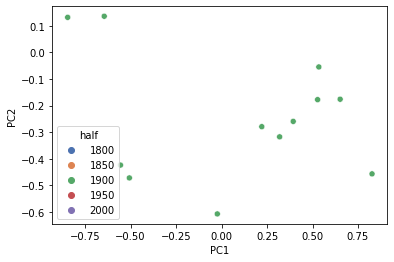

In [44]:
# sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette='deep')
sns.scatterplot(data=y_pca[y_pca['year']==1900], x='PC1', y='PC2', hue=year_series, palette='deep')

#year_series

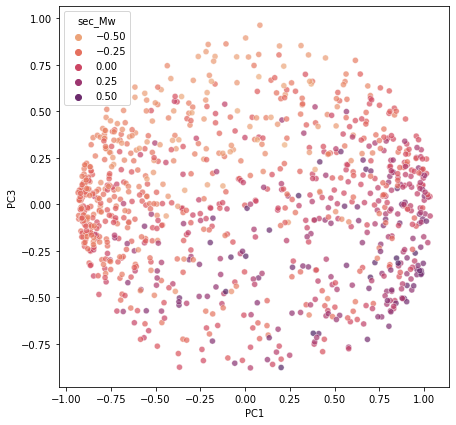

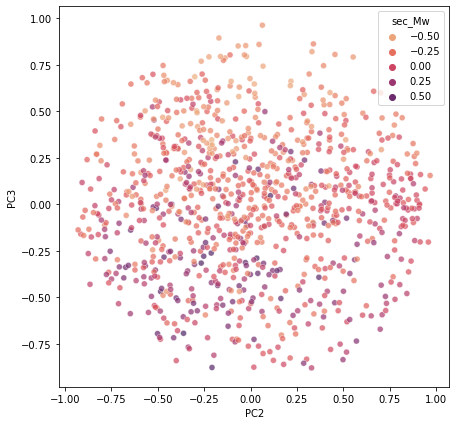

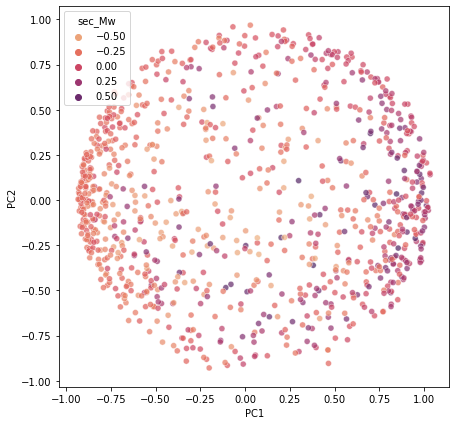

In [27]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue='sec_Mw', palette='flare', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue='sec_Mw', palette='flare', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue='sec_Mw', palette='flare', alpha=0.7)
plt.show()

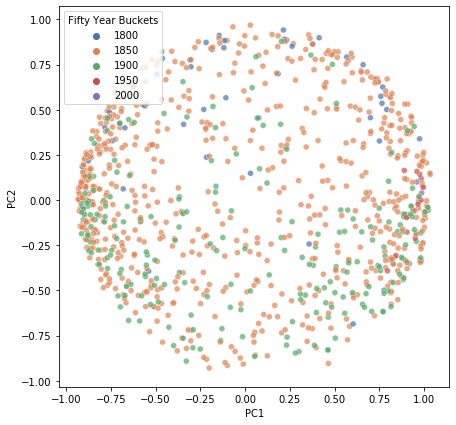

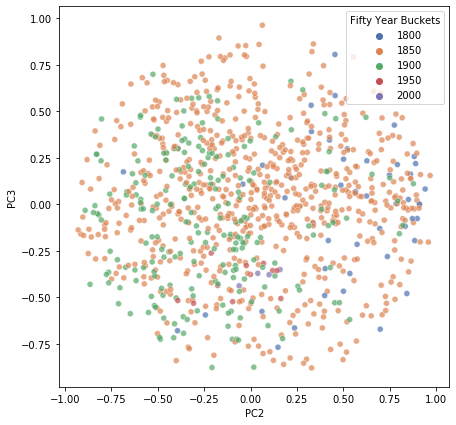

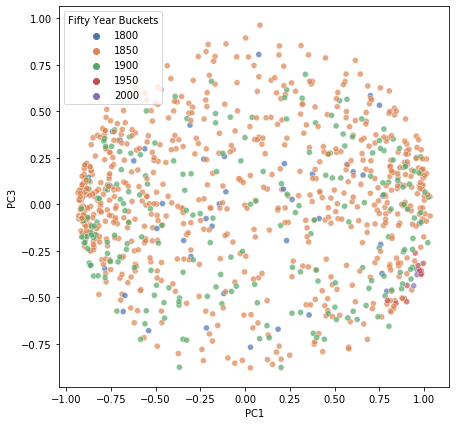

In [40]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC2', hue=year_series, palette='deep', alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC2', y='PC3', hue=year_series, palette='deep', alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, x='PC1', y='PC3', hue=year_series, palette='deep', alpha=0.7)
plt.legend(title="Fifty Year Buckets")
plt.show()

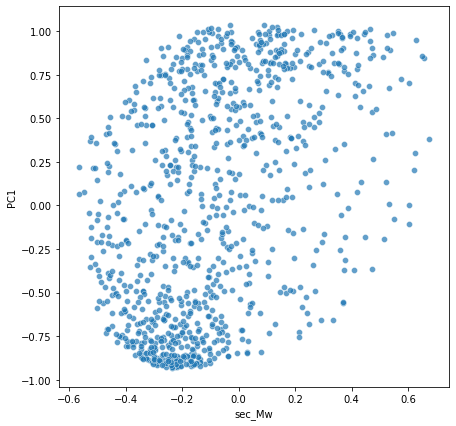

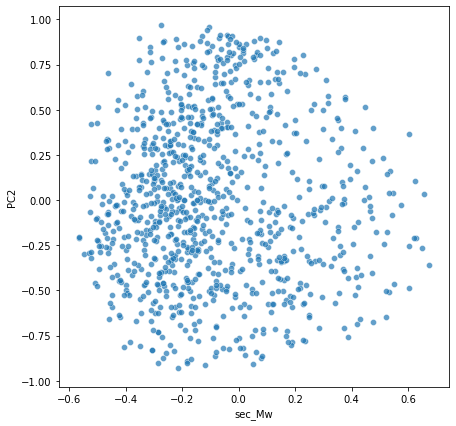

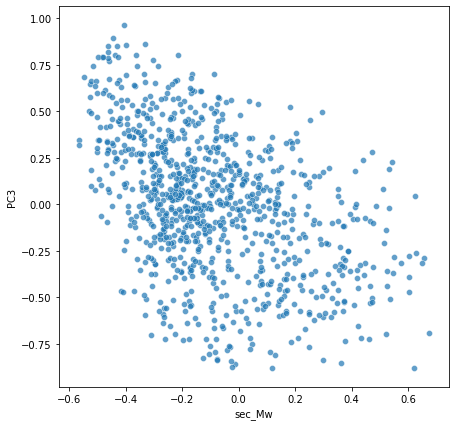

In [38]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC1', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC2', x='sec_Mw', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=PCAs_Mw, y='PC3', x='sec_Mw', alpha=0.7)
plt.show()

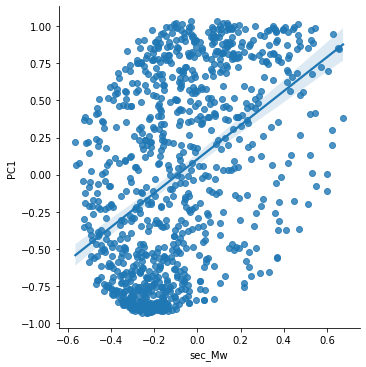

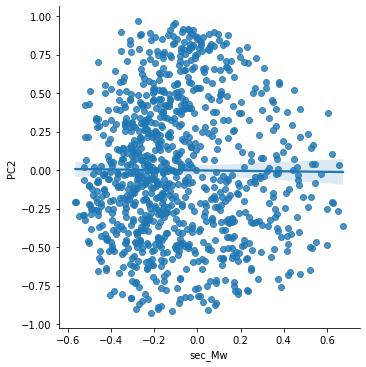

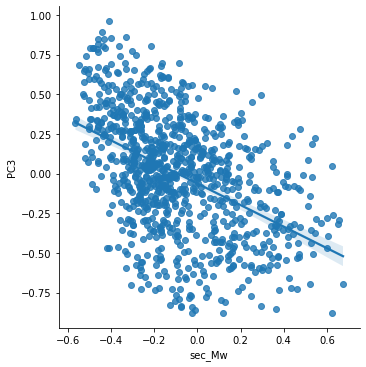

In [39]:
#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC1', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC2', x='sec_Mw')
#plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
sns.lmplot(data=PCAs_Mw, y='PC3', x='sec_Mw')
#plt.show()

# Scree code

In [ ]:
screePipe = pipeline.fit_transform(initData)
scree_pca = PCA(n_components=5)

In [ ]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [ ]:
screeFitTransf

In [ ]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [ ]:
scree_df.head()

## SCREE PLOT

In [ ]:
import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()